# Polinomi di Chebyshev

Quando si fanno fit di polinomi, è molto facile avere valori numerici dei parametri di fit molto che potrebbero causare instabilità negli algoritmi.

Un polinomio, infatti, si scrive come:

$p(x; a_0, \cdots, a_n) = a_0 + a_1 x + \cdots + a_n x^n$

Ora, se $x$ può avere valori molto maggiori di 1, i termini con potenze grandi possono assumere valori numerici molto grandi.

Anche ridurre l'intervallo a $[0,1]$ può non essere sufficiente, e potrebbe avere come effetto valori molto piccoli dei primi coefficienti.

Riprendiamo l'esempio di fit polinomiale già visto in precedenza.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def true_f(x):
    return 150*x*(0.06+np.exp(-0.15*x))

In [3]:
import numpy.random as random
sample_x = np.linspace(1, bins, bins)
sample_y = random.poisson(lam=true_f(sample_x))

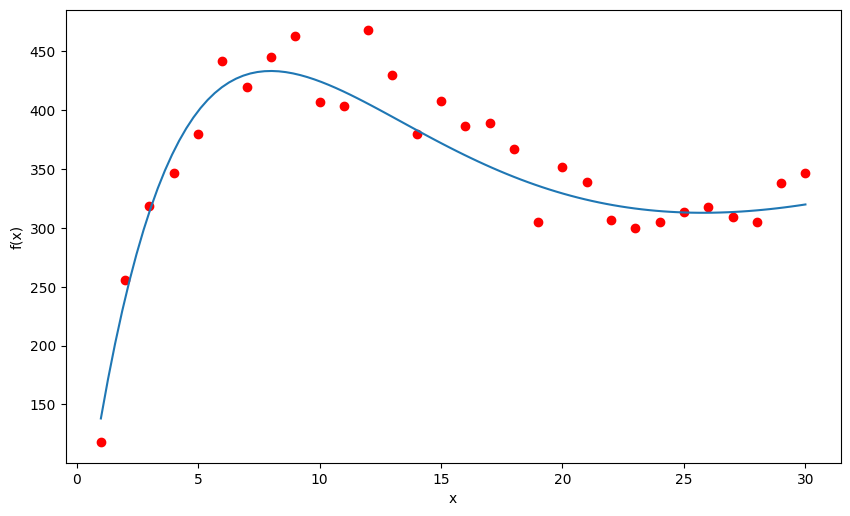

In [4]:
plt.figure(figsize=(10, 6), dpi=100)
xs = np.linspace(1, bins, 100)
ys = true_f(xs)
plt.plot(xs, ys)
plt.scatter(sample_x, sample_y, color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [5]:
from scipy.optimize import curve_fit

def poly(x, *par):
    return np.polyval(par, x)
par, cov = curve_fit(poly, sample_x, sample_y, p0=[1, 100])

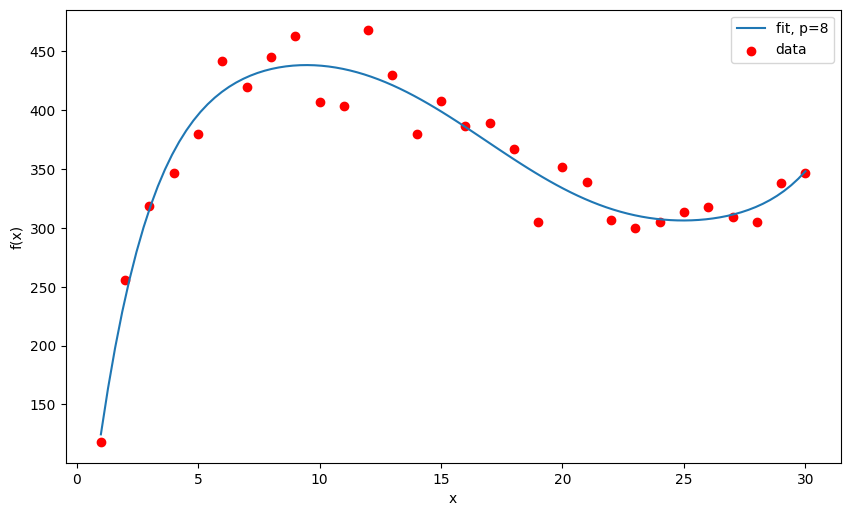

In [6]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
ys = true_f(xs)
p = 8
par, cov = curve_fit(poly, sample_x, sample_y, p0=np.zeros(p+1))
fit_ys = poly(xs, *par)
ax.plot(xs, fit_ys, label='fit, p={:d}'.format(p))
ax.scatter(sample_x, sample_y, color='red', label='data')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.show()

In [7]:
print(par)

[-1.25321671e-08  3.45396961e-06 -3.07825640e-04  1.33847332e-02
 -3.24704982e-01  4.65724131e+00 -4.08937126e+01  2.10235149e+02
 -4.90771747e+01]


Questa situazione si può mitigare usando, anziché una polinomiale, una combinazione lineare di polinomi più regolari.

Tra questi i polinomi di Chebyshev sono definiti come:

$\displaystyle T_n(x) = \sum_{h=0}^{[n/2]} (-1)^h {n \choose 2h} x^{n-2h} (1-x^2)^h$

Dove $[n/2]$ è la parte intera della divizione $n/2$.

I primi polinomi sono:

$T_1(x) = x$

$T_2(x) = 2x^2 - 1 $

$T_3(x) = 4x^3 - 3x$

$T_4(x) = 8x^4 - 8x^2 + 1$

$T_5(x) = 16x^5 - 20x^3 + 5x$

$T_6(x) = 32x^6 - 48x^4 + 18x^2 - 1$

$T_7(x) = 64x^7 - 112x^5 + 56x^3 - 7x$

$T_8(x) = 128x^8 - 256x^6 + 160x^4 - 32x^2 + 1$

$\cdots$

python fornisce la classe  [```Chebyshev```](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.Chebyshev.html#numpy.polynomial.chebyshev.Chebyshev) che rappresenta una combinazione lineare di polinomi di Chebyshev:

$f(x; a_0, \cdots, a_k) = a_0 T_0(x) + \cdots + a_k T_k(x)$

La variabile $x$ deve avere *range* tra -1 e +1.

In [8]:
from numpy.polynomial.chebyshev import Chebyshev

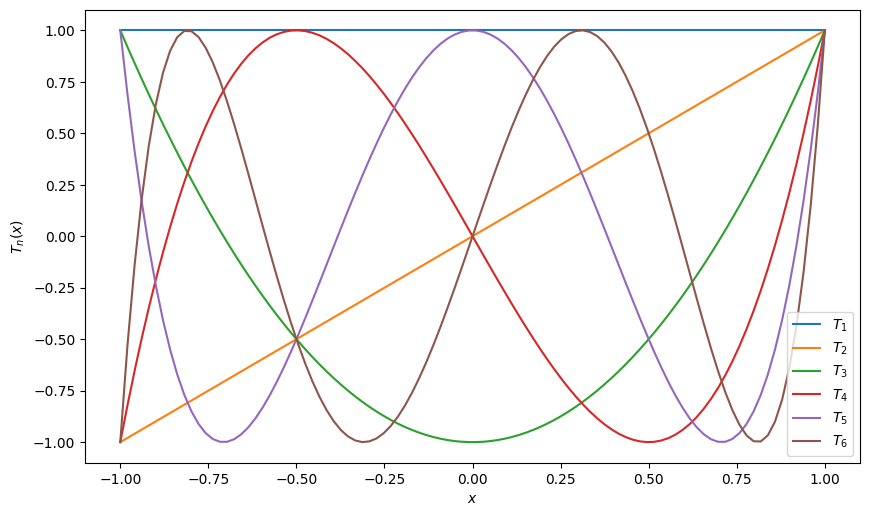

In [9]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
x = np.linspace(-1.0,1.0, 100)
coeff = [[1], [0,1], [0,0,1], [0,0,0,1], [0,0,0,0,1], [0,0,0,0,0,1]]
k = 1
for c in coeff:
    t = Chebyshev(c)
    y = t(x)
    plt.plot(x,y, label='$T_{:d}$'.format(k))
    k += 1
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$T_n(x)$')
plt.show()

In [10]:
def poly_c(x, *par):
    return Chebyshev(par)((x/15)-1)
par, cov = curve_fit(poly_c, sample_x, sample_y, p0=[1,0,0,0,0,0,0,0])

In [11]:
par

array([ 309.00281176,   68.32075372, -113.93444101,  105.60821235,
        -34.07611104,   18.76328036,  -10.38553176,    5.07247606])

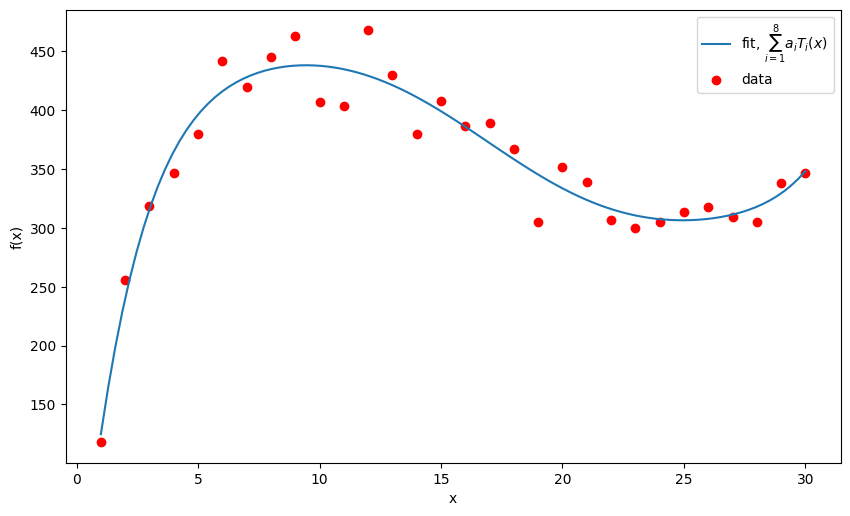

In [12]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
ys = true_f(xs)
fit_ys = poly_c(xs, *par)
ax.plot(xs, fit_ys, label='fit, $\sum_{i=1}^8 a_i T_i(x)$')
ax.scatter(sample_x, sample_y, color='red', label='data')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.show()

In sostanza:
* la curva di fit è la stessa, perché si tratta sempre di un polinomio di un certo grado
* i parametri $a_k$ ora esprimono i coefficienti dei polinomi $T_k(x)$ anziché i coefficienti dei termini $x^k$
* gli intervalli dei valori dei coefficienti $a_k$ hanno valori meno estremi (in alto e in basso) e garantiscono una maggiore stabilità numerica
* comunque, per la maggior parte dei prolemi non troppo complessi questo accorgimento potrebbe non essere necessario